# Gaussian Beam Propagation

## Import files

In [1]:
import BeamProp_Script as bs      # This is the script that handles the propagation
import sympy as sym               # For Symbolic examples
import numpy as np                # Handling of lists and for plotting
import matplotlib.pyplot as plt   # Plotting

### Let's show what BeamProp_Script has

In [2]:
help(bs)

Help on module BeamProp_Script:

NAME
    BeamProp_Script - Created on Wed Feb 19 15:51:54 2020

DESCRIPTION
    @author: wrighta

FUNCTIONS
    W0(zr, lam)
        Parameters
        ----------
        zr : float, integer, symbol
            Rayleigh range in meters
        lam : float, integer, symbol
            Wavelength of light in meters
        
        Returns
        -------
        w0 : float, integer, symbol
            Beam waist radius in meters
    
    Zr(wo, lam)
        Parameters
        ----------
        wo : float, integer, or symbol
            Beam waist radius in meters.
        lam : float, integer, or symbol
            Wavelength of light in meters.
        
        Returns
        -------
        zr : float, int, symbols
            Rayleigh range for given beam waist and wavelength.
    
    lens(f)
        Parameters
        ----------
        f : float or integer or sympy symbol in meters
            Thin lens focal length in meters
        
        Retu

## Let's first see how we define a beam and how we can visualize it propagating.

### A Gaussian beam can be defined by it's (radial) waist, $w_0$, it's Rayleigh range, $z_R = \frac{\pi * w_0^2}{\lambda}$, and the location of its waist, $z_0$.

In [3]:
w0 = 1E-3 # 1mm beam waist
lam = 355E-9 # wavelength of 355 nm (UV)
zR = bs.Zr(w0, lam) # Rayleigh range in m
z0 = 0 # location of waist in m

### We now want to define our "optical system" using matrices. For this first example, we will just use a free space propagation matrix, and let the beam propagate a distance $d$ which we will define using a symbol.

In [4]:
d = sym.symbols('d')
M = bs.prop(d)

### We now use the bs script to do all the ABCD and q-parameter math, and return the waist and radius of curvature functions

In [5]:
R, w = bs.q1_inv_func(0, w0, lam, M)

In [6]:
print('w = {}'.format(w))

w = 0.001*(0.0127690021685256*d**2 + 1)**0.5


### And as simple as that, we have a function for our waist. Let's plot it and see what it looks like

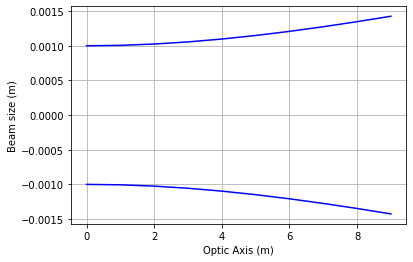

In [8]:
bs.plot(w, d, rang = np.arange(0,10))

### Let's show what happens when a beam travels through a lens. We use the "mult" function to multiply multiple ABCD matrices together.

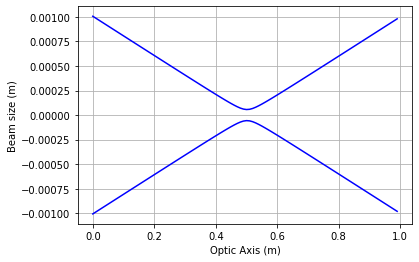

In [12]:
w0 = 1E-3 # 1mm beam waist
lam = 355E-9 # wavelength of 355 nm (UV)
zR = bs.Zr(w0, lam) # Rayleigh range in m
z0 = 0 # location of waist in m

d = sym.symbols('d')
M = bs.mult(bs.prop(d), bs.lens(.5), bs.prop(1))
            
R, w = bs.q1_inv_func(0, w0, lam, M)

bs.plot(w, d, rang = np.arange(0,1,.01))

### Lets look at how to expand and collimate a beam with a two lens system

In [16]:
w0 = 1E-3 # 1mm beam waist
lam = 355E-9 # wavelength of 355 nm (UV)
zR = bs.Zr(w0, lam) # Rayleigh range in m
z0 = 0 # location of waist in m

d1, d2, d3, f1, f2 = sym.symbols('d1 d2 d3 f1 f2')

M = bs.mult(bs.prop(d3),bs.lens(f2),bs.prop(d2), bs.lens(f1), bs.prop(d1))

R, w = bs.q1_inv_func(0, w0, lam, M)

### For example, lets say the beam travels 1 m before hitting the first lens, and we want the beam to be 5x w0 after coming out of the second lens. We substitute d1 for 1 meter, since the beam propagates 1 meter, and we substitute d3 for 0, since we only care about the beam size right at the second lens. This gives us a relation between f1 and d2 (the separation between the lenses).

In [23]:
w = w.subs(d1,1).subs(d3,0)
f1_eq = sym.solve(w - 5*w0, f1)[0]
print('f = {}'.format(f1_eq))

f = 1.0084642216545e+15*d2*(1.12051580183833e+27*d2 - 4.41556446152598e+29*sqrt(1 - 0.000504320418227052*d2**2) + 8.88733242867719e+28)/(1.13000009595246e+42*d2**2 + 2.26000019190491e+42*d2 - 2.12276362486616e+45)


#### Suppose we wanted the distance between the lenses to be 1 meter, we could find what f1 we need.

In [26]:
print('f1 = {:.2f} m, for a lens separation of 1 meter'.format(f1_eq.subs(d2, 1)))

f1 = 0.17 m, for a lens separation of 1 meter


### Now we need to collimate the beam. Lets still assume the beam propagates 1 m, and f1 = .17 m.

There are a couple different ways to think about collimation. One is that the beam size doesn't change over a long distance. The other is that the radius of curvature is infinite (i.e. a plane wave). Lets us the latter interpretation. Thus, we want to find the focal length f2 that makes R infinite, or that makes 1/R =0.

In [41]:
R_coll = R.subs(d1,1).subs(d2,1).subs(f1,.17).subs(d3,0)
f2_coll = sym.solve(1/R_coll,f2)[0]
print('f2 = {:.2f}, for a collimated beam, 5x the original waist, after propagating 1m to the first lens of f1 = .17m, and propagating another 1m to the second lens'.format(f2_coll))

f2 = 0.83, for a collimated beam, 5x the original waist, after propagating 1m to the first lens of f1 = .17m, and propagating another 1m to the second lens


### Lets plot the beam profile after the second lens, and see if it is collimated.

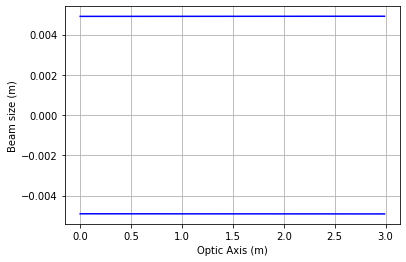

In [43]:
M = bs.mult(bs.prop(d3),bs.lens(.83),bs.prop(1), bs.lens(.17), bs.prop(1))

R, w = bs.q1_inv_func(0, w0, lam, M)

bs.plot(w,d3)

### Looks very collimated. Lets check the beam size (to make sure its 5* w0) and check the collimation

In [46]:
expansion_factor = w.subs(d3,0)/ w0
print('beam is w = {:.2f} x w0'.format(expansion_factor))

beam is w = 4.90 x w0


In [49]:
beam_size_change = (w.subs(d3,10) - w.subs(d3,0)) / w.subs(d3,0) * 100
print('Over 10 m after second lens, beam changes by {:.0f}%'.format(beam_size_change))

Over 10 m after second lens, beam changes by 1%
